<a href="https://colab.research.google.com/github/JoDeMiro/ImageProcessing/blob/main/19_Image_Spectogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

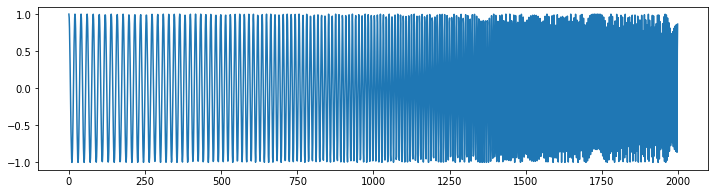

In [14]:
dt = 0.001

duration = 2

time = np.arange(0, duration, dt)

f0 = 50
f1 = 250

x = np.cos(2*np.pi*time*(f0 + (f1-f0)*np.power(time, 2)/(3*duration**2)))

plt.figure(figsize=(12, 3))
plt.plot(x)
plt.show()

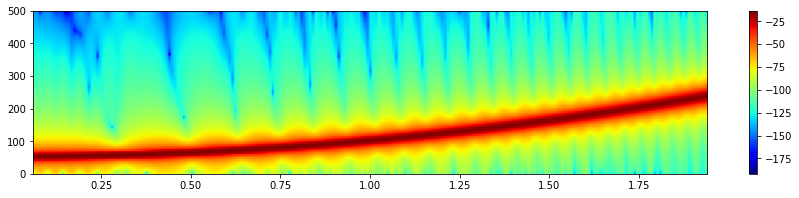

In [22]:
plt.figure(figsize=(15.1, 3))
plt.specgram(x, NFFT=128, Fs=1/dt, noverlap=120, cmap='jet')
plt.colorbar()
plt.show()

In [31]:
%%capture
!wget https://github.com/JoDeMiro/Data/blob/main/Audio/30.mp?raw=true

In [32]:
y, sampling_rate = librosa.load('30.mp?raw=true')

In [36]:
# Play an audio
from google.colab import output
output.eval_js('new Audio("https://github.com/JoDeMiro/Data/blob/main/Audio/30.mp?raw=true").play()')

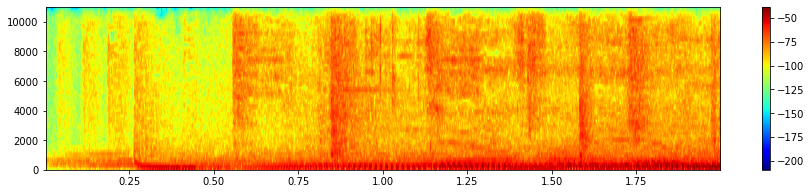

In [40]:
plt.figure(figsize=(15.1, 3))
plt.specgram(y[0:sampling_rate*2], NFFT=128, Fs=sampling_rate, noverlap=100, cmap='jet')
plt.colorbar()
plt.show()

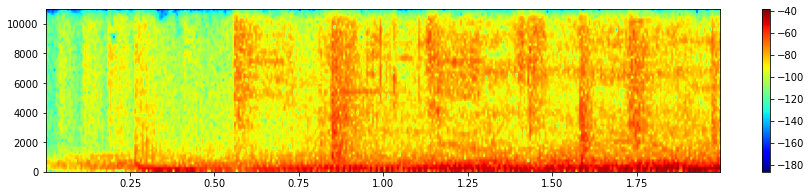

In [44]:
plt.figure(figsize=(15.1, 3))
plt.specgram(y[0:sampling_rate*2], NFFT=128, Fs=sampling_rate, noverlap=3, cmap='jet')
plt.colorbar()
plt.show()